In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
raw_dir = ['../dataset/mp_data/voltage_2020_08_05.csv']
target_dir = ['../regression/result/dnn_2020_09_25/32']
prefix = 'H_test_dnn_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,0.810446,3.140704,2353,2.330258,2.330258,Li8TiMn3(PO4)6,Li9TiMn3(PO4)6,0.014068,98.612729
1,0.614296,2.748674,3536,2.134378,2.134378,Na2NiO2,KNa2NiO2,0.076403,92.902038
2,0.905842,2.881392,750,1.975550,1.975550,Li8(CoO2)5,Li2CoO2,0.031886,96.909952
3,4.887962,2.923768,5053,-1.964194,1.964194,NaCa3Fe(SiO3)8,NaCa3Mg3Fe(SiO3)8,0.054274,94.852005
4,1.037040,2.913632,3580,1.876592,1.876592,K4Co2O5,K6Co2O5,0.017645,98.266124
5,2.819894,4.502695,1024,1.682801,1.682801,Cr(PO3)3,LiCr(PO3)3,0.076689,92.877309
6,6.238580,4.591405,1695,-1.647175,1.647175,Li2FeF6,Li3FeF6,0.091560,91.611967
7,1.584249,3.048261,3768,1.464012,1.464012,Sr2V2GaO7,Sr2YV2GaO7,0.087111,91.986944
8,5.229663,3.815159,2343,-1.414504,1.414504,LiFe2(SiO4)2,LiFeSiO4,0.048810,95.346146
9,4.769038,3.359487,915,-1.409551,1.409551,LiMn2(PO4)2,LiMnPO4,0.027933,97.282615


In [4]:
df_high_vol = concat_data[concat_data['test_ground_truth'] > 3.5] 
print('voltage > 3.5 case MAE') 
print(mean_absolute_error(df_high_vol['test_ground_truth'].values, df_high_vol['test_pred'].values)) 
print('original MAE')
print(mean_absolute_error(concat_data['test_ground_truth'].values, concat_data['test_pred'].values))

voltage > 3.5 case MAE
0.37728531459671344
original MAE
0.3698858879570643


In [5]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    # xy_lim = [min_val - margin, max_val + margin]
    xy_lim = [0, 7.0]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test  RMSE_test
0       test  0.780292  0.369886   0.489766


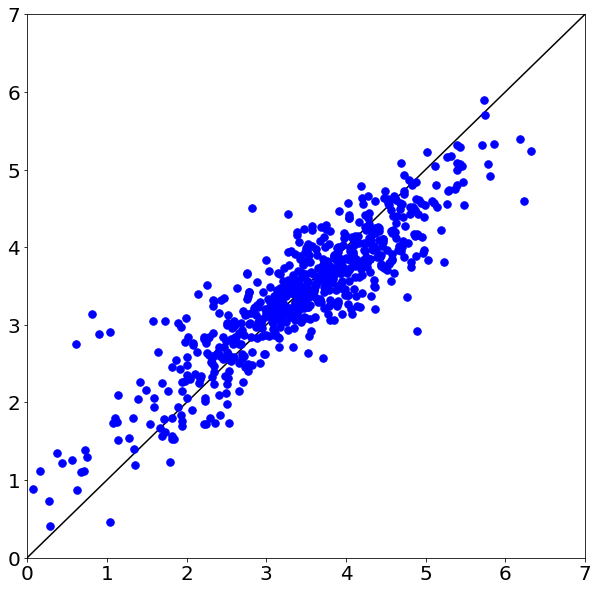

In [6]:
yy_plot(target_dir[0], prefix + 'yyplot')